In [3]:
import acoular
# ts = acoular.MaskedTimeSamples( name="/media/xian/Data/dataset/Bekaert/h5files/44.h5", invalid_channels=[9] )
ts = acoular.MaskedTimeSamples( name="test_signal_9_2source.h5", invalid_channels=[9] )
ps = acoular.PowerSpectra( time_data=ts, block_size=1024, window="Hanning" )
from os import path
# micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')
micgeofile = "array_9.xml"
mg = acoular.MicGeom( from_file=micgeofile )
rg = acoular.RectGrid( x_min=-0.2, x_max=4,
                       y_min=-0.2, y_max=4,
                       z=0.5, increment=0.01 )
st = acoular.SteeringVector( grid=rg, mics=mg, steer_type='true location', ref=[1.88,1.87,1.68] )
bb = acoular.BeamformerBase( freq_data=ps, steer=st )

[('test_signal_9_2source_cache.h5', 1)]
[('test_signal_9_2source_cache.h5', 2)]


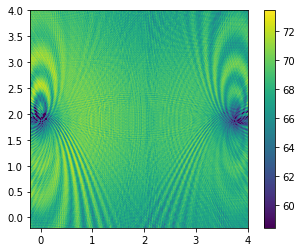

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
Lm = acoular.L_p( bb.synthetic(8000,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

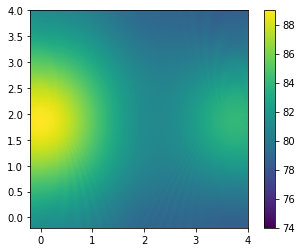

In [5]:
bb.r_diag = False
Lm = acoular.L_p( bb.synthetic(8000,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

[('test_signal_9_2source_cache.h5', 3)]


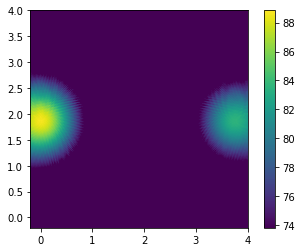

In [6]:
bf = acoular.BeamformerFunctional( freq_data=ps, steer=st, gamma=50  )
Lm = acoular.L_p( bf.synthetic(8000,3) )
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();

In [3]:
bt = acoular.BeamformerTime( source=ts, steer=st )
ft = acoular.FiltOctave( source=bt, band=8000, fraction='Third octave' )
pt = acoular.TimePower( source=ft )
avgt = acoular.TimeAverage( source=pt, naverage=6400 )
res = [r.copy() for r in avgt.result(1)]
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
for i,r in enumerate(res):
    pm = r[0].reshape(rg.shape)
    Lm = acoular.L_p(pm)
    plt.subplot(2,4,i+1)
    plt.imshow(Lm.T, vmin=Lm.max()-15, origin='lower', extent=rg.extend())
    plt.title('sample %i to %i' % (i*6400,i*6400+6399))
plt.tight_layout();

In [6]:
# bm = acoular.BeamformerMusic( freq_data=ps, steer=st )
# Lm = acoular.L_p( bm.synthetic(8000,3) )
# plt.figure()
# plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
# plt.colorbar();

In [7]:
# bs = acoular.BeamformerCleansc( freq_data=ps, steer=st )
# Lm = acoular.L_p( bs.synthetic( 8000, 3) )
# plt.figure()
# plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
# plt.colorbar();